In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow --quiet

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

In [25]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file

In [26]:
#checking the length of the train and test set
len(X_train), len(X_test)

(42000, 18000)

# Visualizing the Images

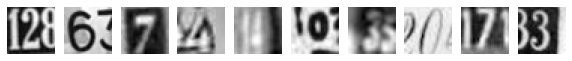

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [27]:
# Visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

# Data Preparation

In [28]:
# Shape of the images and the first image
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [29]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs
X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [30]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [31]:
# New shape 
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [32]:
# One-hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# No.of classes
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

# Model Building

In [34]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [35]:
# Define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers


model1 = Sequential() 
model1.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", input_shape=(32, 32, 1)))
model1.add(LeakyReLU(0.1))
model1.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(32))
model1.add(LeakyReLU(0.1))
model1.add(Dense(10, activation='softmax'))

adam = optimizers.Adam(learning_rate=0.001)
model1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                      

In [36]:
model_1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
1050/1050 [==============================] - 91s 86ms/step - loss: 1.1274 - accuracy: 0.6303 - val_loss: 0.6497 - val_accuracy: 0.8087
Epoch 2/20
1050/1050 [==============================] - 86s 82ms/step - loss: 0.5352 - accuracy: 0.8475 - val_loss: 0.5254 - val_accuracy: 0.8448
Epoch 3/20
1050/1050 [==============================] - 90s 85ms/step - loss: 0.4416 - accuracy: 0.8700 - val_loss: 0.5049 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 87s 83ms/step - loss: 0.3781 - accuracy: 0.8888 - val_loss: 0.4486 - val_accuracy: 0.8739
Epoch 5/20
1050/1050 [==============================] - 84s 80ms/step - loss: 0.3330 - accuracy: 0.9004 - val_loss: 0.4592 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 86s 82ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.4640 - val_accuracy: 0.8735
Epoch 7/20
1050/1050 [==============================] - 86s 82ms/step - loss: 0.2622 - accuracy: 0.9216 - val_loss: 0.4506 -

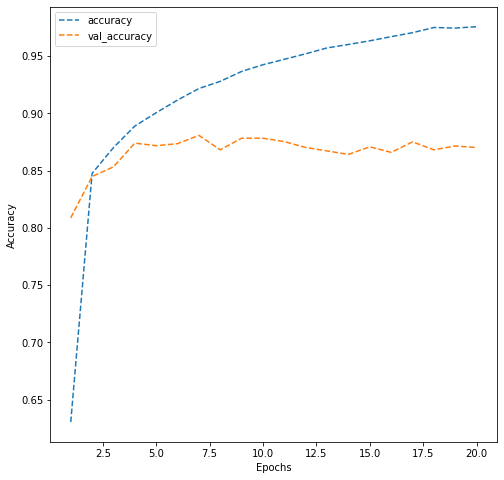

In [37]:
# Plotting the accuracies on training and validation data

dict_hist = model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<b>The accuracy on the train set is much better (about 12%) than the validation set. We can say that model is overfitting the training data.<br>
We can correct this by adding dropout layers and more convolution layers for feature extraction.

We will build another model.

In [38]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [39]:
model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", input_shape=(32, 32, 1)))
model2.add(LeakyReLU(0.1))
model2.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model2.add(LeakyReLU(0.1))
model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model2.add(LeakyReLU(0.1))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(32))
model2.add(LeakyReLU(0.1))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))
    
adam = optimizers.Adam(learning_rate=1e-3)
model2.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [40]:
history_model_2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=128, verbose=1)

Epoch 1/30
263/263 [==============================] - 152s 563ms/step - loss: 1.3271 - accuracy: 0.5491 - val_loss: 1.8763 - val_accuracy: 0.3475
Epoch 2/30
263/263 [==============================] - 149s 566ms/step - loss: 0.6722 - accuracy: 0.7940 - val_loss: 0.5646 - val_accuracy: 0.8446
Epoch 3/30
263/263 [==============================] - 147s 561ms/step - loss: 0.5530 - accuracy: 0.8310 - val_loss: 0.4333 - val_accuracy: 0.8739
Epoch 4/30
263/263 [==============================] - 148s 563ms/step - loss: 0.4921 - accuracy: 0.8483 - val_loss: 0.4754 - val_accuracy: 0.8651
Epoch 5/30
263/263 [==============================] - 147s 561ms/step - loss: 0.4399 - accuracy: 0.8624 - val_loss: 0.3768 - val_accuracy: 0.8963
Epoch 6/30
263/263 [==============================] - 143s 544ms/step - loss: 0.4033 - accuracy: 0.8764 - val_loss: 0.3743 - val_accuracy: 0.8935
Epoch 7/30
263/263 [==============================] - 148s 561ms/step - loss: 0.3876 - accuracy: 0.8813 - val_loss: 0.3795 -

In [41]:
#predicting on test data
test_pred = model2.predict(X_test)
test_pred = np.argmax(test_pred, axis=-1)

563/563 [==============================] - 21s 37ms/step


In [42]:
# Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.89      0.93      0.91      1828
           2       0.94      0.90      0.92      1803
           3       0.90      0.89      0.89      1719
           4       0.94      0.92      0.93      1812
           5       0.90      0.92      0.91      1768
           6       0.92      0.88      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.93      0.88      0.90      1812
           9       0.90      0.92      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



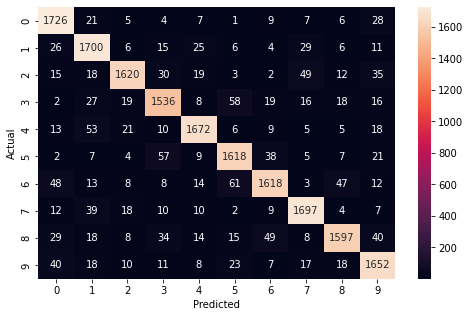

In [43]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<br>The CNN has an accuracy of 91% which is better than the Artificial neural Network(ANN).